In [3]:
%pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: C:\Users\rgs88\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import pickle
import joblib


In [2]:
school_grade_data = pd.read_csv(r"Dataset\final_school_grade_data.csv")
school_grade_data

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset\\final_school_grade_data.csv'

In [40]:
def data_inspection(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [41]:
data_inspection(school_grade_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
school,0,0,0.0,2,object
sex,0,0,0.0,2,object
age,0,0,0.0,8,int64
address,0,0,0.0,2,object
famsize,0,0,0.0,2,object
Pstatus,0,0,0.0,2,object
Medu,0,0,0.0,5,int64
Fedu,0,0,0.0,5,int64
Mjob,0,0,0.0,5,object
Fjob,0,0,0.0,5,object


In [42]:
for col in school_grade_data.columns:
    if set(school_grade_data[col].unique()) == {'yes', 'no'}:
        school_grade_data[col] = school_grade_data[col].map({'yes': 1, 'no': 0})

In [43]:
school_grade_data.schoolsup.value_counts()

schoolsup
0    925
1    119
Name: count, dtype: int64

In [44]:
data_inspection(school_grade_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
school,0,0,0.0,2,object
sex,0,0,0.0,2,object
age,0,0,0.0,8,int64
address,0,0,0.0,2,object
famsize,0,0,0.0,2,object
Pstatus,0,0,0.0,2,object
Medu,0,0,0.0,5,int64
Fedu,0,0,0.0,5,int64
Mjob,0,0,0.0,5,object
Fjob,0,0,0.0,5,object


In [71]:
school_grade_data.G3.value_counts()

G3
10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
20      1
4       1
1       1
Name: count, dtype: int64

In [46]:
label_encoder = LabelEncoder()

# Iterate through the columns and encode them
categorical_columns = ['guardian', 'Mjob', 'Fjob', 'reason', 'Pstatus', "famsize", "address", "sex", "school"]
for col in categorical_columns:
    school_grade_data[col] = label_encoder.fit_transform(school_grade_data[col])

In [47]:
data_inspection(school_grade_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
school,0,0,0.0,2,int32
sex,0,0,0.0,2,int32
age,0,0,0.0,8,int64
address,0,0,0.0,2,int32
famsize,0,0,0.0,2,int32
Pstatus,0,0,0.0,2,int32
Medu,0,0,0.0,5,int64
Fedu,0,0,0.0,5,int64
Mjob,0,0,0.0,5,int32
Fjob,0,0,0.0,5,int32


In [49]:
school_grade_corr = school_grade_data.corr()
school_grade_corr["G3"]

school       -0.127114
sex          -0.031472
age          -0.125282
address       0.117696
famsize       0.061209
Pstatus      -0.030693
Medu          0.201472
Fedu          0.159796
Mjob          0.105640
Fjob          0.040541
reason        0.108671
guardian     -0.077320
traveltime   -0.102627
studytime     0.161629
failures     -0.383145
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
nursery       0.039950
higher        0.236578
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
Dalc         -0.129642
Walc         -0.115740
health       -0.080079
absences     -0.045671
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

In [17]:
def data_statistics(df):
    statistics = []
    
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for column in numeric_columns:
        summary_stats = df[column].describe()
        skewness = df[column].skew()
        kurt = df[column].kurtosis()
        
        statistics.append({
            "Column": column,
            "Mean": summary_stats['mean'],
            "Std": summary_stats['std'],
            "Min": summary_stats['min'],
            "25%": summary_stats['25%'],
            "50%": summary_stats['50%'],
            "75%": summary_stats['75%'],
            "Max": summary_stats['max'],
            "Skewness": skewness,
            "Kurtosis": kurt
        })
    
    return pd.DataFrame(statistics)

In [18]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(12, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [50]:
def remove_outliers_iqr(df, column_name):
    df_copy = df.copy()
    
    Q1 = df_copy[column_name].quantile(0.25)
    Q3 = df_copy[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_copy = df_copy[(df_copy[column_name] >= lower_bound) & (df_copy[column_name] <= upper_bound)]

    return df_copy

In [51]:
school_grade_data_1 = remove_outliers_iqr(school_grade_data, "absences")
school_grade_data_2 = remove_outliers_iqr(school_grade_data_1, "G1")
school_grade_data_3 = remove_outliers_iqr(school_grade_data_2, "G2")
final_school_grade_data = remove_outliers_iqr(school_grade_data_3, "G3")

In [55]:
correlation_threshold = 0.10

correlated_variables = []

for col in school_grade_corr.columns:
    # Check if the absolute correlation with any of the School Grades is greater than the threshold
    if  school_grade_corr['G3'][col] > correlation_threshold:
        correlated_variables.append(col)

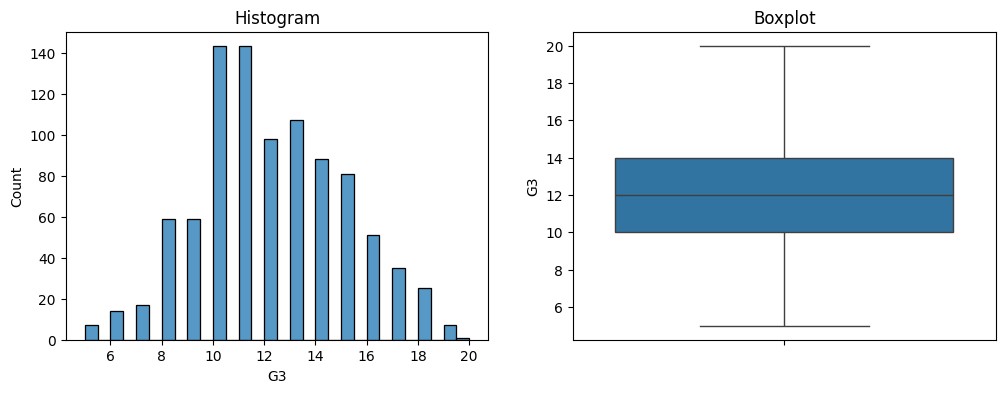

In [56]:
diagnostic_plots(final_school_grade_data, "G3")

## Model Training

In [60]:
X = final_school_grade_data.drop(columns = {"G3"}, axis=1)
y = final_school_grade_data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [72]:
X.schoolsup.value_counts()

schoolsup
0    823
1    112
Name: count, dtype: int64

In [76]:
school_grade_data.Mjob.value_counts()

Mjob
2    399
3    239
0    194
4    130
1     82
Name: count, dtype: int64

In [70]:
X.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2
0       0    16   1        1        1        4     3     4     3     0       1         3           2          0         0          1       0     1           1        1       1         0         5       4         3      1     2     1       2         16  15    2
             15   0        0        1        1     1     0     2     1       1         2           4          0         1          1       1     1           1        1       1         0         3       1         2      1     1     1       4         13  13    1
        1    18   1        0        1        2     1     3     3     3       1         1           3          0         0          0       0     1           1        1       1         0         4       2         4      1  

In [61]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_std, y_train)

y_pred = svr_model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Dataset 1 - Mean Squared Error:", mse)
print("Dataset 1 - R-squared:", r2)

Dataset 1 - Mean Squared Error: 0.758412999457234
Dataset 1 - R-squared: 0.9056167286683606


In [65]:
# Saving the Model
model_filename = 'svm_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(svr_model, model_file)


In [67]:
# Saving Standard Scalers and Label Encoders
joblib.dump(scaler, "scaler_grade.pkl")
joblib.dump(label_encoder, "label_encoder_grade.pkl")

['label_encoder_grade.pkl']

In [68]:
final_school_grade_data.to_csv(r"final_school_grade_data.csv")


In [22]:
# guardian_mapping = {"mother": 0, "father": 1, "other": 2}
# school_grade_data['guardian'] = school_grade_data['guardian'].map(guardian_mapping)

# Mjob_mapping = {"health": 0, "teacher": 1, "at_home": 2, "services": 3, "other": 4}
# school_grade_data["Mjob"] = school_grade_data["Mjob"].map(Mjob_mapping)

# Fjob_mapping = {"health": 0, "teacher": 1, "at_home": 2, "services": 3, "other": 4}
# school_grade_data["Fjob"] = school_grade_data["Fjob"].map(Fjob_mapping)

# reason_mapping = {"course": 0, "home": 1, "reputation": 2, "other": 3}
# school_grade_data["reason"] = school_grade_data["reason"].map(reason_mapping)

# # T is together, A is apart for Parental Status
# Pstatus_mappping = {"T": 0, "A": 1}
# school_grade_data["Pstatus"] = school_grade_data["Pstatus"].map(reason_mapping)
